# Data Analysis of Hostels in Japan

In [103]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

According to [japan guide](https://www.japan-guide.com/e/e2025.html), accomodation prices range from less than $\yen 20,000$ per person in a hostel dormitory to over  $\yen 50,000$ per person in a first class hotel or ryokan.

### Questions

- What is the average price per night when budgeting a stay in Japan?

### Preprocessing & Cleaning

We'll start by renaming columns and casting the Distance column from string to numeric type, first removing 'km from city centre' from each entry.

In [104]:
hostel = pd.read_csv('Hostel.csv', index_col=0)
hostel.columns = ["Name", "City", "Price", 
                      "Distance", "Score", "Rating", "Atmosphere", 
                      "Cleaniness", "Facilities", "Location", "Security", "Staff", "Value", 
                      "Longitude", "Latitude"]

In [105]:
hostel.groupby('City').count()

,Name,Price,Distance,Score,Rating,Atmosphere,Cleaniness,Facilities,Location,Security,Staff,Value,Longitude,Latitude
City,,,,,,,,,,,,,,
Fukuoka-City,19,19,19,17,17,17,17,17,17,17,17,17,14,14
Hiroshima,14,14,14,14,14,14,14,14,14,14,14,14,13,13
Kyoto,78,78,78,73,73,73,73,73,73,73,73,73,66,66
Osaka,104,104,104,101,101,101,101,101,101,101,101,101,89,89
Tokyo,127,127,127,122,122,122,122,122,122,122,122,122,116,116


Further explaination of the variables:

- **Price**: Minimum price for 1 night stay (￥）
- **Score**: Total rating score of a hostel.
    - **Atmosphere**: Hostel’s rating score of atmosphere
    - **Cleanliness**: Hostel’s rating score of cleanliness
    - **Facilities**: Hostel’s rating score of facilities
    - **Location**: Hostel’s rating score of location
    - **Security**: Hostel’s rating score of security
    - **Staff**: Hostel’s rating score of staff
    - **Value**: Hostel’s rating score of value for money


In [106]:
hostel["Distance"] = hostel["Distance"].str.split("km").str[0]
hostel.head(1)

,Name,City,Price,Distance,Score,Rating,Atmosphere,Cleaniness,Facilities,Location,Security,Staff,Value,Longitude,Latitude
1,"""Bike & Bed"" CharinCo Hostel",Osaka,3300,2.9,9.2,Superb,8.9,9.4,9.3,8.9,9.0,9.4,9.4,135.513767,34.682678


In [107]:
hostel.Distance = pd.to_numeric(hostel.Distance) # Cast Distance to numeric 

We continue by removing the Longitude and Latitude columns in the dataframe, they won't be necessary in answering our question.  
We also remove any rows that contain 5 or more NULL values.

In [108]:
hostel.drop(['Longitude', 'Latitude'], axis=1, inplace=True) # remove latitude, longitude column
hostel.dropna(thresh=5, inplace=True) # remove rows that contain less than 5 values

In [109]:
print('There are %d NULL values in our dataframe' %hostel.isnull().any().sum()) # check if there are any null values
hostel.tail()

There are 0 NULL values in our dataframe


,Name,City,Price,Distance,Score,Rating,Atmosphere,Cleaniness,Facilities,Location,Security,Staff,Value
338,YADOYA Guesthouse Green,Tokyo,2300,2.6,8.2,Fabulous,7.9,7.7,6.9,8.9,8.9,8.8,8.3
339,YADOYA Guesthouse Orange,Tokyo,2000,2.9,8.9,Fabulous,8.6,9.0,7.8,9.4,9.0,9.2,9.4
340,YAWP! backpackers,Tokyo,2500,17.5,9.3,Superb,9.5,9.3,9.4,8.5,9.5,9.2,9.6
341,You En Me House,Kyoto,2800,2.4,8.0,Fabulous,7.3,8.0,6.7,8.0,8.7,10.0,7.3
342,Zabutton Hostel,Tokyo,2900,5.9,8.6,Fabulous,8.1,8.5,7.8,9.0,8.9,9.5,8.5


## Exploratory Data Analysis

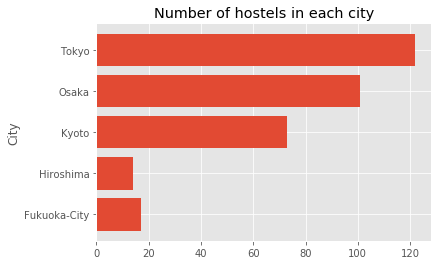

In [110]:
#  number of hostels in each city
hostel.groupby('City').size().plot(kind='barh', width=0.8, title='Number of hostels in each city', )
plt.show()

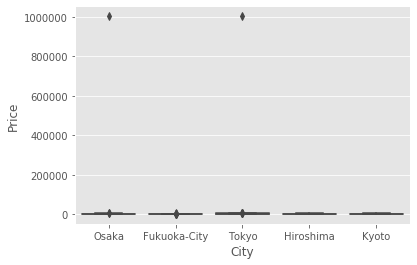

In [120]:
sns.boxplot(hostel.City, hostel['Price'])
plt.show()

Two obvious outliers in Tokyo and Osaka which we remove from the dataset.

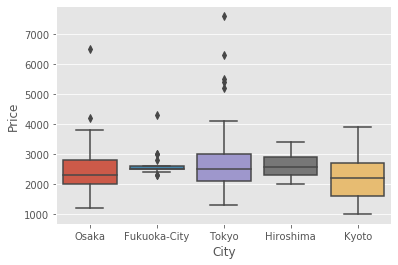

In [121]:
hostel = hostel[hostel["Price"] < 10000]
sns.boxplot(hostel.City, hostel['Price'])
plt.show()

It's expected that Tokyo would have a large range of hostel prices considering it is the capital city, the most popular place to stay.

### Location, Location, Location

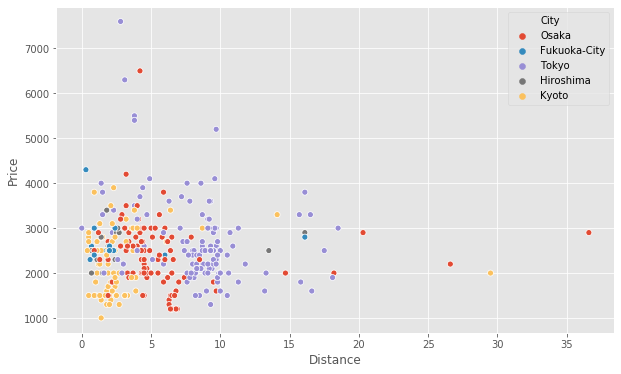

In [122]:
plt.figure(figsize = (10,6))
sns.scatterplot(data=hostel, x=hostel.Distance, y=hostel.Price, hue=hostel.City,)
plt.show()

It's surprising to see that distance from the city centre doesn't affect the pricing of Hostels.  
Especially Kyoto, the majority of hostels are located within 5km of its centre.

## SQL-like Pandas Queries

As well as computing summary statistics for the entire dataset we will query the dataframe to find specific entries such as the hostel with the minimum price.

In [241]:
hostel.describe(exclude='O')

,Price,Distance,Score,Atmosphere,Cleaniness,Facilities,Location,Security,Staff,Value
count,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000
mean,2492.000000,5.776615,8.786462,8.252615,9.012000,8.592000,8.696000,8.950154,9.137231,8.859692
std,819.965371,4.623211,0.962508,1.374986,1.216988,1.286755,1.105297,1.116532,1.088009,1.037926
min,1000.000000,0.000000,3.100000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,4.000000
25%,2000.000000,2.300000,8.600000,7.900000,8.800000,8.000000,8.000000,8.700000,9.000000,8.600000
50%,2500.000000,4.500000,9.000000,8.600000,9.300000,9.000000,9.000000,9.200000,9.400000,9.100000
75%,2900.000000,8.500000,9.400000,9.000000,9.800000,9.300000,9.400000,9.600000,9.800000,9.500000
max,7600.000000,36.600000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [185]:
## Rating bands Rating -> Good -> V. Good -> Fabulous -> Superb
rating_ratio = hostel.groupby('Rating')['Score'].count() * 100/ hostel.Rating.count()
rating_band = ['Rating', 'Good', 'Very Good', 'Fabulous', 'Superb']
rating_ratio = rating_ratio[rating_band]

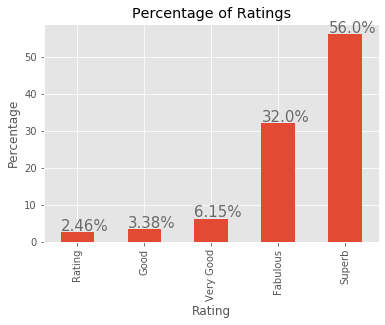

In [236]:
ax = rating_ratio.plot(kind='bar', title='Percentage of Ratings',)
for i in ax.patches:
    ax.annotate(str(np.round(i.get_height(), 2))+'%', (i.get_x(), i.get_height()+0.4),
                fontsize=15, color='dimgrey')
plt.ylabel('Percentage')
plt.show()

In [117]:
hostel.sort_values(by='Price')[:3]

,Name,City,Price,Distance,Score,Rating,Atmosphere,Cleaniness,Facilities,Location,Security,Staff,Value
63,Downtown Inn Kyoto,Kyoto,1000,1.4,9.3,Superb,8.9,9.7,9.7,9.1,9.1,8.6,9.7
262,Peace House Abeno,Osaka,1200,6.9,9.0,Superb,9.0,9.1,9.1,8.2,9.1,9.1,9.3
179,Ikidane House Namba,Osaka,1200,6.5,9.3,Superb,8.9,9.6,9.7,8.8,8.9,9.6,9.6


The lowest priced hostel is in Kyoto at $\yen 1000$ a night. Followed by $\yen 1200$ in Osaka.

What is even more surprising is the price doesn't affect the quality of satisfaction. All three Hostels achieving a summary score of 9.0 or higher.


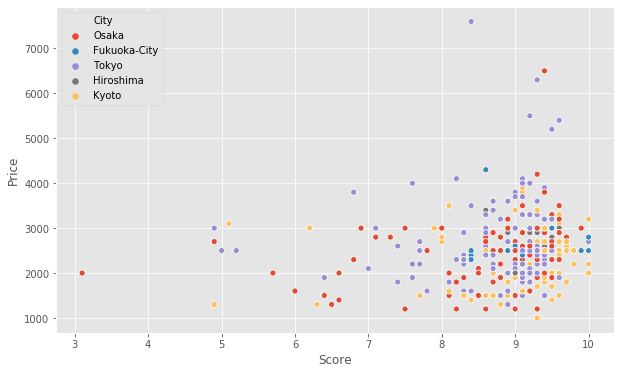

In [123]:
plt.figure(figsize = (10,6))
sns.scatterplot(data=hostel, x=hostel.Score, y=hostel.Price, hue=hostel.City,)
plt.show()

In [245]:
hostel.groupby('Rating').describe()['Score']

,count,mean,std,min,25%,50%,75%,max
Rating,,,,,,,,
Fabulous,104.0,8.595192,0.277079,8.0,8.40,8.65,8.900,8.9
Good,11.0,6.500000,0.275681,6.0,6.35,6.50,6.700,6.9
Rating,8.0,4.850000,0.755929,3.1,4.90,4.95,5.125,5.7
Superb,182.0,9.345055,0.264581,9.0,9.10,9.30,9.500,10.0
Very Good,20.0,7.530000,0.249420,7.0,7.40,7.60,7.700,7.9


We confirm a general trend of hostels in Tokyo, Kyoto and Osaka- a low priced hostel does not correlate with a lower customer rating.

In fact only 2% of hostels listed on Hostel World have a score lower than 6/10.

In addition, 88% of the hostels have a score higher than 8/10.

## Conclusion

From the dataset we found out that hostels provide low cost accomodation for high satisfaction.

What is even more surprising is that there doesn't seem to be a correlation with distance from the city centre and price per night. 